**Importing**

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [ ]:
from scipy.stats import mode
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


from sklearn import datasets, metrics
from sklearn.naive_bayes import GaussianNB

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
from copy import deepcopy
import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score

In [ ]:
import random as rd
from sklearn import preprocessing

In [ ]:
from sklearn import datasets
from keras.datasets import mnist

In [ ]:
import pandas as pd

import itertools

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

import matplotlib.gridspec as gridspec

from mlxtend.plotting import plot_decision_regions
from mlxtend.preprocessing import shuffle_arrays_unison

import seaborn as sns

from tqdm.notebook import tqdm_notebook as tqdm

**Bayesian classifier implementation**

In [ ]:
class BayesianClassifier:
    def __init__(self):
        self.y_train = None
        self.mean = None
        self.std = None
    
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.parameters = []
        self.mean = np.mean(X,axis=0)
        self.std = np.std(X,axis=0)
        for i in range(len(self.std)):
          if (self.std[i] < 0.00000000001):
            self.std[i] = 0.00000000001
        for c in self.classes:
            X_c = (X[y == c]-self.mean)/self.std
            mean = np.mean(X_c, axis=0)
            var = np.var(X_c, axis=0)
            self.parameters.append((mean, var))
        self.y_train = y

    def predict(self, X):
      X = (X-self.mean)/self.std
      likelihood = []
      for mean, var in self.parameters:
          likelihood.append(np.exp(- (X - mean) ** 2 / (2 * var)) / np.sqrt(2 * np.pi * var))
      likelihood = np.array(likelihood)
      class_count = np.bincount(self.y_train)
      length = len(class_count)
      class_count = class_count/class_count.sum()
      class_count = class_count.reshape(length,1,1)
      post_prob = likelihood * class_count
      probb = np.argmax(post_prob, axis=0).tolist()
      result = []
      for i in range(len(probb)):
        result.append(max(set(probb[i]), key = probb[i].count))
      return np.array(result)

**IRIS data**

Reading and pre-processing

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**Applying my bayesian classifier on IRIS data**

In [ ]:
# Instantiate the classifier and fit it to the training data
bc = BayesianClassifier()
bc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = bc.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", str(accuracy_score(y_test, y_pred)*100)+'%')

Accuracy: 83.33333333333334%


**Scores**

Confusion matrix

In [ ]:
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[12  0  0]
 [ 0  8  0]
 [ 0  5  5]]


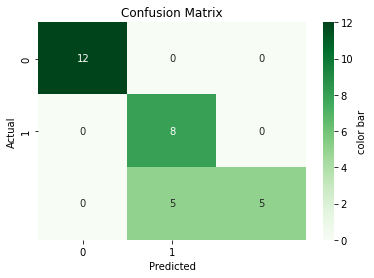

In [ ]:
sns.heatmap(cm,cmap="Greens",annot=True,
            cbar_kws={"orientation":"vertical","label":"color bar"},
            xticklabels=[0,1],yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Normalized confusion matrix

In [ ]:
print("Normalized Confusion Matrix:")
cm_normalized=np.round(cm/np.sum(cm,axis=1).reshape(-1,1),2)
print(cm_normalized)

Normalized Confusion Matrix:
[[1.  0.  0. ]
 [0.  1.  0. ]
 [0.  0.5 0.5]]


Normalized confusion matrix heatmap

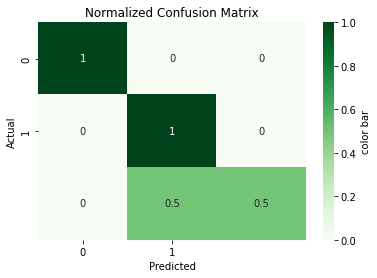

In [ ]:
sns.heatmap(cm_normalized, cmap="Greens", annot=True,
            cbar_kws={"orientation": "vertical", "label": "color bar"},
            xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Normalized Confusion Matrix")
plt.show()

f1 score

In [ ]:
f1_scoree = f1_score(np.array(y_test),y_pred,average=None)
print("f1 score:",f1_scoree)

f1 score: [1.         0.76190476 0.66666667]


Others

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.62      1.00      0.76         8
           2       1.00      0.50      0.67        10

    accuracy                           0.83        30
   macro avg       0.87      0.83      0.81        30
weighted avg       0.90      0.83      0.83        30



**Applying sklearn bayesian classifier on IRIS data**

In [ ]:
# Create an instance of the GaussianNB class
clf = GaussianNB()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Use the classifier to predict the class labels of the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier's performance
accuracy = metrics.accuracy_score(y_test, y_pred)

print("Accuracy:", str(accuracy*100)+'%')

Accuracy: 93.33333333333333%


**Scores**

Confusion matrix

In [ ]:
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[12  0  0]
 [ 0  8  0]
 [ 0  2  8]]


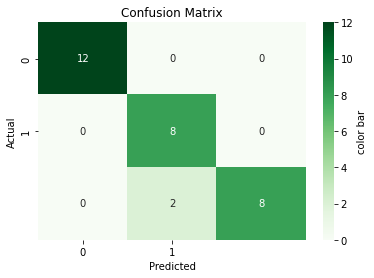

In [ ]:
sns.heatmap(cm,cmap="Greens",annot=True,
            cbar_kws={"orientation":"vertical","label":"color bar"},
            xticklabels=[0,1],yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Normalized confusion matrix

In [ ]:
print("Normalized Confusion Matrix:")
cm_normalized=np.round(cm/np.sum(cm,axis=1).reshape(-1,1),2)
print(cm_normalized)

Normalized Confusion Matrix:
[[1.  0.  0. ]
 [0.  1.  0. ]
 [0.  0.2 0.8]]


Normalized confusion matrix heatmap

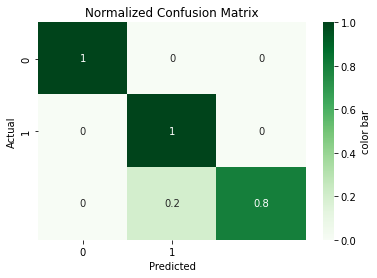

In [ ]:
sns.heatmap(cm_normalized, cmap="Greens", annot=True,
            cbar_kws={"orientation": "vertical", "label": "color bar"},
            xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Normalized Confusion Matrix")
plt.show()

f1 score

In [ ]:
f1_scoree = f1_score(np.array(y_test),y_pred,average=None)
print("f1 score:",f1_scoree)

f1 score: [1.         0.88888889 0.88888889]


Others

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.80      1.00      0.89         8
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.95      0.93      0.93        30



**mnist data**

Visualisation

In [ ]:
digits = datasets.load_digits()

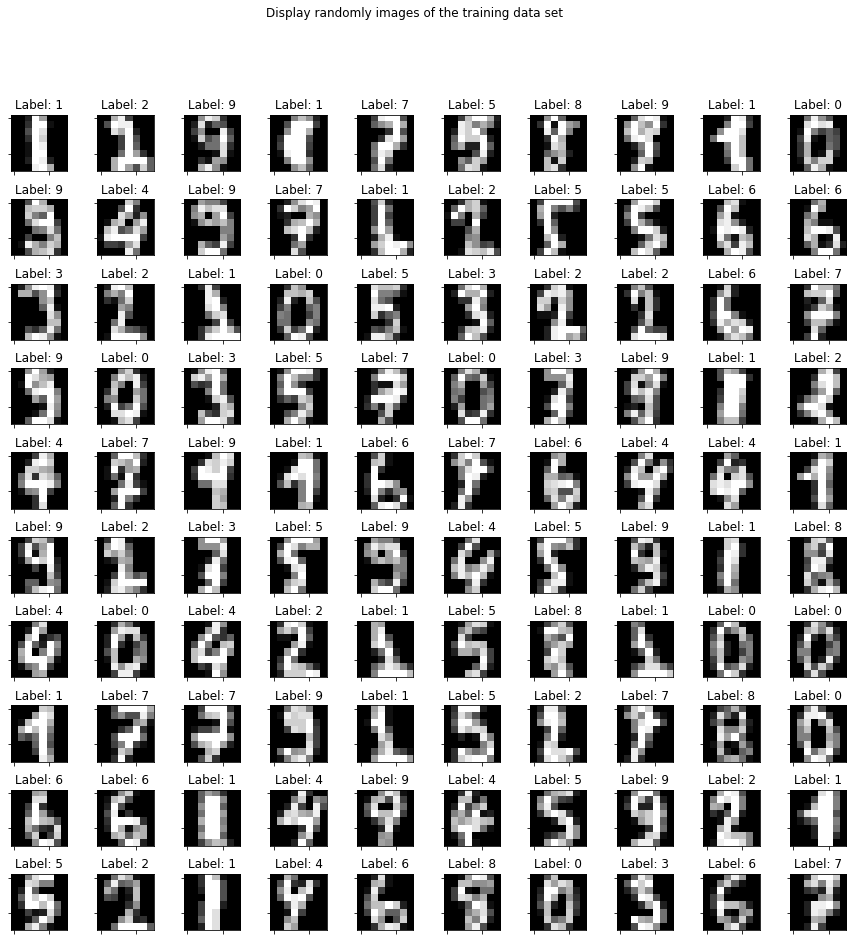

In [ ]:
# A helper display function

# check the reshape line, adjust it if needed for your image size
def displayData(X,Y):
    # set up array
    fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(15,15))
    fig.suptitle( "Display randomly images of the training data set")
    # loop over randomly drawn numbers
    for i in range(10):
        for j in range(10):
            ind = np.random.randint(X.shape[0])
            tmp = X[ind,:].reshape(8,8)
            ax[i,j].set_title("Label: {}".format(Y[ind]))
            ax[i,j].imshow(tmp, cmap='gray') # display it as gray colors.
            plt.setp(ax[i,j].get_xticklabels(), visible=False)
            plt.setp(ax[i,j].get_yticklabels(), visible=False)
    
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    return tmp
data = displayData(digits.images,digits.target) 

Loading data

In [ ]:
mnistt = fetch_openml('mnist_784')

In [ ]:
X, y = mnistt['data'], mnistt['target']

pre-processing

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
#train test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#shuffling
X_train, y_train = shuffle_arrays_unison(arrays=[X_train, y_train], random_seed=42)
X_test, y_test = shuffle_arrays_unison(arrays=[X_test, y_test], random_seed=42)
#normalize the data attributes
#getting some information about data
print("x train:", X_train.shape)
print("y train:", y_train.shape)
print("x test:", X_test.shape)
print("x test:", y_test.shape)
print("x train max:",X_train.max())
print("x train min:",X_train.min())
print("y train max:",y_train.max())
print("y train min:",y_train.min())
#make each image in a row
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)
#scaling to have range of [0:1]
X_train_scaled = X_train.astype('float32') / 255.0
X_test_scaled = X_test.astype('float32') / 255.0
#getting less data for time
X_train_less = X_train_scaled[0:1000,:]
X_test_less = X_test_scaled[0:200,:]
y_train_less = y_train[0:1000]
y_test_less = y_test[0:200]
#normalization
X_train_less = preprocessing.normalize(X_train_less).tolist()
X_test_less = preprocessing.normalize(X_test_less).tolist()
y_train_less = y_train[0:1000].tolist()
y_test_less = y_test[0:200].tolist()

x train: (56000, 784)
y train: (56000,)
x test: (14000, 784)
x test: (14000,)
x train max: 255.0
x train min: 0.0
y train max: 9
y train min: 0


**Applying my Bayesian classifier on mnist**

Pre-processing 

In [ ]:
X_train = X_train_less
X_test = X_test_less
y_train = y_train_less
y_test = y_test_less

y_train = [eval(i) for i in y_train]
y_test = [eval(i) for i in y_test]

Applying

In [ ]:
# Instantiate the classifier and fit it to the training data
bc = BayesianClassifier()
bc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = bc.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", str(accuracy_score(y_test, y_pred)*100)+'%')

<ipython-input-250-eafb7fe92c0c>:26: RuntimeWarning: divide by zero encountered in true_divide
  likelihood.append(np.exp(- (X - mean) ** 2 / (2 * var)) / np.sqrt(2 * np.pi * var))
<ipython-input-250-eafb7fe92c0c>:26: RuntimeWarning: invalid value encountered in true_divide
  likelihood.append(np.exp(- (X - mean) ** 2 / (2 * var)) / np.sqrt(2 * np.pi * var))


Accuracy: 12.642857142857142%


**Scores**

Confusion matrix

In [ ]:
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 170 1173    0    0    0    0    0    0    0    0]
 [   0 1600    0    0    0    0    0    0    0    0]
 [   0 1380    0    0    0    0    0    0    0    0]
 [   0 1433    0    0    0    0    0    0    0    0]
 [   0 1295    0    0    0    0    0    0    0    0]
 [   0 1273    0    0    0    0    0    0    0    0]
 [   1 1395    0    0    0    0    0    0    0    0]
 [   0 1503    0    0    0    0    0    0    0    0]
 [   2 1355    0    0    0    0    0    0    0    0]
 [   1 1419    0    0    0    0    0    0    0    0]]


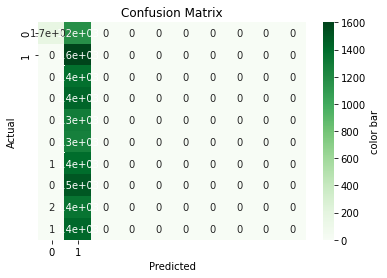

In [ ]:
sns.heatmap(cm,cmap="Greens",annot=True,
            cbar_kws={"orientation":"vertical","label":"color bar"},
            xticklabels=[0,1],yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Normalized confusion matrix

In [ ]:
print("Normalized Confusion Matrix:")
cm_normalized=np.round(cm/np.sum(cm,axis=1).reshape(-1,1),2)
print(cm_normalized)

Normalized Confusion Matrix:
[[0.13 0.87 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]]


Normalized confusion matrix heatmap

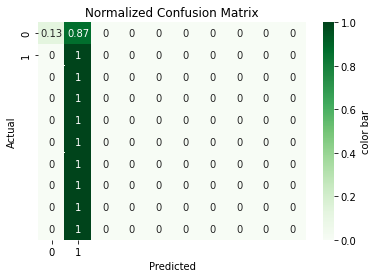

In [ ]:
sns.heatmap(cm_normalized, cmap="Greens", annot=True,
            cbar_kws={"orientation": "vertical", "label": "color bar"},
            xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Normalized Confusion Matrix")
plt.show()

f1 score

In [ ]:
f1_scoree = f1_score(np.array(y_test),y_pred,average=None)
print("f1 score:",f1_scoree)

f1 score: [0.22412657 0.20744198 0.         0.         0.         0.
 0.         0.         0.         0.        ]


Others

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.13      0.22      1343
           1       0.12      1.00      0.21      1600
           2       0.00      0.00      0.00      1380
           3       0.00      0.00      0.00      1433
           4       0.00      0.00      0.00      1295
           5       0.00      0.00      0.00      1273
           6       0.00      0.00      0.00      1396
           7       0.00      0.00      0.00      1503
           8       0.00      0.00      0.00      1357
           9       0.00      0.00      0.00      1420

    accuracy                           0.13     14000
   macro avg       0.11      0.11      0.04     14000
weighted avg       0.11      0.13      0.05     14000



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Applying sklearn Bayesian classifier on mnist**

In [ ]:
# Create an instance of the GaussianNB class
clf = GaussianNB()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Use the classifier to predict the class labels of the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier's performance
accuracy = metrics.accuracy_score(y_test, y_pred)

print("Accuracy:", str(accuracy*100)+'%')

Accuracy: 55.15714285714286%


**Scores**

Confusion matrix

In [ ]:
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[1218    2    9    2    4    2   52    2   32   20]
 [   2 1520    3    5    0    4   15    1   39   11]
 [ 142   40  408  102    5    5  331    0  327   20]
 [ 118   66   12  462    2    8   90    9  496  170]
 [  51    7   15    6  170    7  146    5  278  610]
 [ 183   31   10   18    4   56   77    3  757  134]
 [  16   25    6    0    2    4 1316    0   24    3]
 [   8   10    3   16    8    3    1  417   50  987]
 [  28  160    5    9    3    3   30    3  816  300]
 [   9    8    7    4    8    0    1   20   24 1339]]


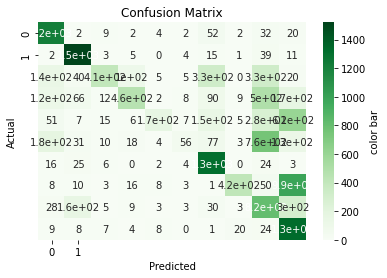

In [ ]:
sns.heatmap(cm,cmap="Greens",annot=True,
            cbar_kws={"orientation":"vertical","label":"color bar"},
            xticklabels=[0,1],yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Normalized confusion matrix

In [ ]:
print("Normalized Confusion Matrix:")
cm_normalized=np.round(cm/np.sum(cm,axis=1).reshape(-1,1),2)
print(cm_normalized)

Normalized Confusion Matrix:
[[0.91 0.   0.01 0.   0.   0.   0.04 0.   0.02 0.01]
 [0.   0.95 0.   0.   0.   0.   0.01 0.   0.02 0.01]
 [0.1  0.03 0.3  0.07 0.   0.   0.24 0.   0.24 0.01]
 [0.08 0.05 0.01 0.32 0.   0.01 0.06 0.01 0.35 0.12]
 [0.04 0.01 0.01 0.   0.13 0.01 0.11 0.   0.21 0.47]
 [0.14 0.02 0.01 0.01 0.   0.04 0.06 0.   0.59 0.11]
 [0.01 0.02 0.   0.   0.   0.   0.94 0.   0.02 0.  ]
 [0.01 0.01 0.   0.01 0.01 0.   0.   0.28 0.03 0.66]
 [0.02 0.12 0.   0.01 0.   0.   0.02 0.   0.6  0.22]
 [0.01 0.01 0.   0.   0.01 0.   0.   0.01 0.02 0.94]]


Normalized confusion matrix heatmap

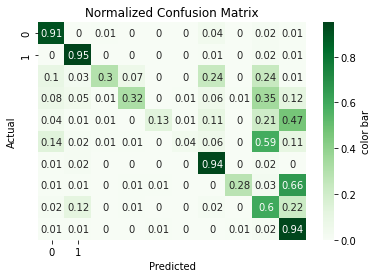

In [ ]:
sns.heatmap(cm_normalized, cmap="Greens", annot=True,
            cbar_kws={"orientation": "vertical", "label": "color bar"},
            xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Normalized Confusion Matrix")
plt.show()

f1 score

In [ ]:
f1_scoree = f1_score(np.array(y_test),y_pred,average=None)
print("f1 score:",f1_scoree)

f1 score: [0.78127004 0.87633324 0.43918192 0.44919786 0.22651566 0.08205128
 0.7617945  0.42485991 0.38857143 0.53410451]


Others

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.91      0.78      1343
           1       0.81      0.95      0.88      1600
           2       0.85      0.30      0.44      1380
           3       0.74      0.32      0.45      1433
           4       0.83      0.13      0.23      1295
           5       0.61      0.04      0.08      1273
           6       0.64      0.94      0.76      1396
           7       0.91      0.28      0.42      1503
           8       0.29      0.60      0.39      1357
           9       0.37      0.94      0.53      1420

    accuracy                           0.55     14000
   macro avg       0.67      0.54      0.50     14000
weighted avg       0.68      0.55      0.51     14000



**Comments**



```
1. I applied my baysian classifier and skelearn baysian classifier on IRIS data and mnist data, then showed accuracy, confusion matrix, f1 score and, others.
2. I used 2 datasets to show that the model can do well, but accuracy with mnist is worse than accuracy with IRIS.
3. I used my model and sklearn, so I can judge how good or bad my model.
4. After a lot of trials, my model accuracy with mnist is still bad, but with IRIS, it was so good.

